#CSE 101: Computer Science Principles
####Stony Brook University
####Kevin McDonnell (ktm@cs.stonybrook.edu)
##Module 18: Data Visualization with matplotlib



### Overview

matplotlib is a collection of capabilities for visualizing data. pandas itself has a number of built-in functions for visualization, but these depend on matplotlib.

matplotlib has two styles we can use for plotting data:
* a function-based approach and
* an object-oriented approach

Which one people use comes down to personal preference, largely. We will see both.

The best way to learn how to use matplotlib is by [example](https://matplotlib.org/gallery/index.html), so let's get to it.

### Example: Plot a Function

A simple line plot can be used to visualize a mathematical function. We provide the $x$ and $y$ coordinates of the points in separate lists or NumPy ndarray objects. Adjacent points are connected automatically with line segments.

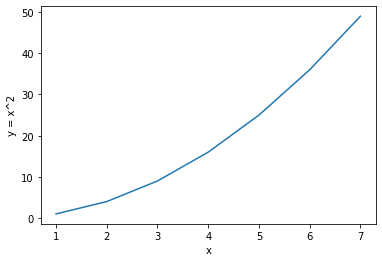

In [2]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4, 5, 6, 7], [1, 4, 9, 16, 25, 36, 49])
plt.xlabel('x')
plt.ylabel('y = x^2')
plt.show()

matplotlib works directly with NumPy array objects, which is a huge help.

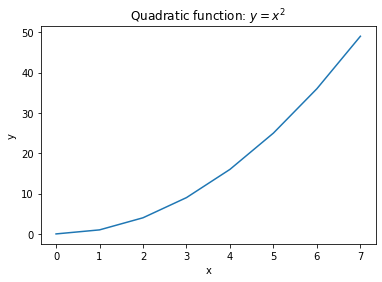

In [3]:
import numpy as np

x = np.array([0, 1, 2, 3, 4, 5, 6, 7])
y = np.array([0, 1, 4, 9, 16, 25, 36, 49])
plt.plot(x, y) 
plt.xlabel('x')
plt.ylabel('y')
plt.title('Quadratic function: $y = x^2$')
plt.show()

In fact, matplotlib can plot functions directly if you provide a mathematical formula.

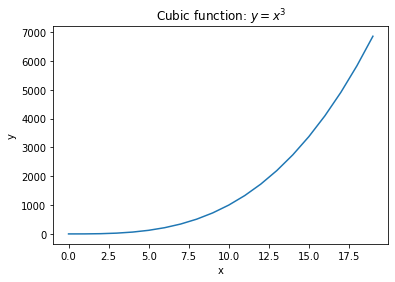

In [ ]:
x = np.arange(0, 20)
plt.plot(x**3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic function: $y = x^3$')
plt.show()

We can change the style of the plot to show only dots instead of line segments.

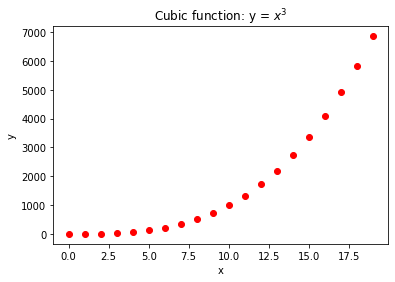

In [ ]:
x = np.arange(0, 20)
plt.plot(x**3, 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic function: y = $x^3$')
plt.show()

There are many different [styles](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) available for the plotting points, including shape and color.

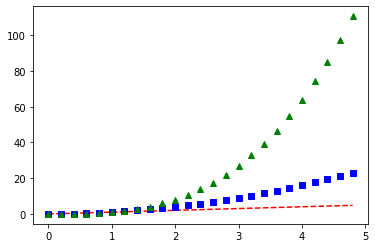

In [ ]:
x = np.arange(0.0, 5.0, 0.2)
# red dashes, blue squares and green triangles
plt.plot(x, x, 'r--', x, x**2, 'bs', x, x**3, 'g^')
plt.show()

### Example: Scatter Plots

A **scatter plot** is a 2D data visualization technique for showing the relationship between two variables. Download the file [`StudentsPerformance.csv`](https://drive.google.com/file/d/1gq2WUWVMkA8wsSSy68UeG8-_nJahXcm2/view?usp=sharing) and then upload it to Colab before executing the code below. The original data-set is available on [kaggle](https://www.kaggle.com/spscientist/students-performance-in-exams).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# https://www.kaggle.com/spscientist/students-performance-in-exams
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


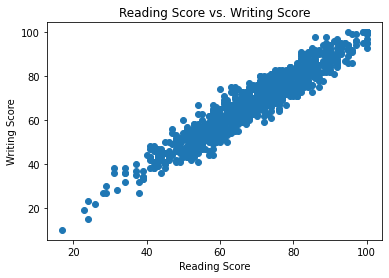

In [ ]:
plt.scatter(df['reading score'], df['writing score'])
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.title('Reading Score vs. Writing Score')
plt.show()

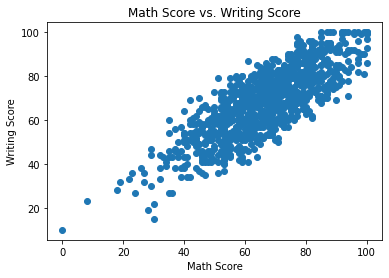

In [ ]:
plt.scatter(df['math score'], df['writing score'])
plt.xlabel('Math Score')
plt.ylabel('Writing Score')
plt.title('Math Score vs. Writing Score')
plt.show()

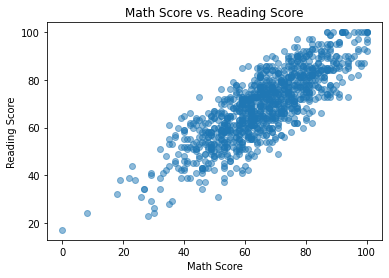

In [ ]:
plt.scatter(df['math score'], df['reading score'], alpha=0.5)
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.title('Math Score vs. Reading Score')
plt.show()

pandas affords a way to show all possible scatter plots using its `scatter_matrix` function. This kind of visualization is called a **scatter plot matrix** or **splom**, for short.

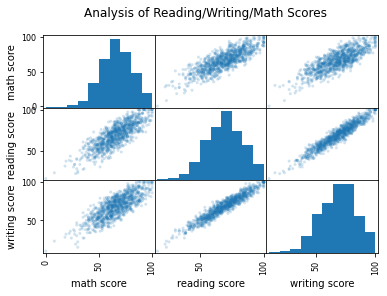

In [ ]:
df2 = df[['math score', 'reading score', 'writing score']]

pd.plotting.scatter_matrix(df2, alpha=0.2)
plt.suptitle('Analysis of Reading/Writing/Math Scores')
plt.show()

### Example: Bar Charts

In the example below we use the `subplots` function, which lets us switch to the object-oriented interface to matplotlib. You might find it easier to use when you want to set the various attributes of plots.

You can use the [Google color picker](https://www.google.com/search?q=color+picker) to choose hexadecimal color codes.


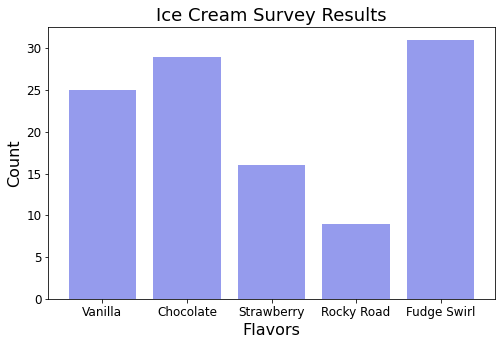

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

flavors = ['Vanilla', 'Chocolate', 'Strawberry', 'Rocky Road', 'Fudge Swirl']
counts = [25, 29, 16, 9, 31]
fig, ax = plt.subplots(figsize=(8, 5))  # change the size of the figure
x_pos = np.arange(len(flavors))  # compute position of labels on x-axis
ax.bar(x_pos, counts, align='center', color='#959bed')  # using RGB color mode
ax.set_xticks(x_pos)  # set the positions of the labels on the x-axis
ax.set_xticklabels(flavors)  # set the labels on the x-axis
ax.xaxis.set_tick_params(labelsize=12)  # set font size of tick labels on x-axis
ax.yaxis.set_tick_params(labelsize=12)  # set font size of tick labels on y-axis
plt.xlabel('Flavors', fontsize=16)  # set font size of x-axis label
plt.ylabel('Count', fontsize=16)  # set font size of y-axis label
plt.title('Ice Cream Survey Results', fontsize=18)  # set font size of title
plt.show()

### Example: Stacked Bar Chart

A stacked bar chart lets you visualize what is essentially 2D data as a set of bar charts. We can use this kind of chart when we have numerical values divided among several categories. The chart works well for comparing the numerical values in each category. Note that pandas is not used in this example.

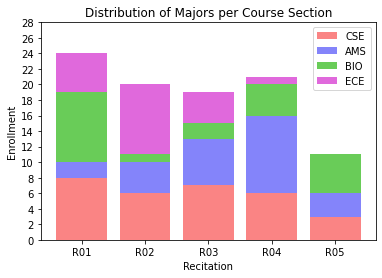

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

cse = [8, 6, 7, 6, 3]
ams = [2, 4, 6, 10, 3]
bio = [9, 1, 2, 4, 5]
ece = [5, 9, 4, 1, 0]

x_pos = np.arange(len(cse))    # the x locations for the groups
p1 = plt.bar(x_pos, cse, color='#fa8484')
p2 = plt.bar(x_pos, ams, bottom=np.array(cse), color='#8484fa')
p3 = plt.bar(x_pos, bio, bottom=np.array(cse)+np.array(ams), color='#69cc58')
p4 = plt.bar(x_pos, ece, bottom=np.array(cse)+np.array(ams)+np.array(bio), color='#e069dc')

plt.xlabel('Recitation')
plt.ylabel('Enrollment')
plt.title('Distribution of Majors per Course Section')
plt.xticks(x_pos, ('R01', 'R02', 'R03', 'R04', 'R05'))
plt.yticks(np.arange(0, 30, 2))
plt.legend((p1, p2, p3, p4), ('CSE', 'AMS', 'BIO', 'ECE'))
plt.show()

An alternate version, with less code, but less (immediate) customization, but uses pandas.

First, let's create a dataframe from a dictionary.

In [ ]:
cse = [8, 6, 7, 6, 3]
ams = [2, 4, 6, 10, 3]
bio = [9, 1, 2, 4, 5]
ece = [5, 9, 4, 1, 0]
rec = ['R01', 'R02', 'R03', 'R04', 'R05']

data = {'Rec': rec, 'CSE': cse, 'AMS': ams, 'BIO': bio, 'ECE': ece}
df = pd.DataFrame.from_dict(data)
df

,Rec,CSE,AMS,BIO,ECE
0,R01,8,2,9,5
1,R02,6,4,1,9
2,R03,7,6,2,4
3,R04,6,10,4,1
4,R05,3,3,5,0


Now we can create the stacked bar chart with a lot less work than before.

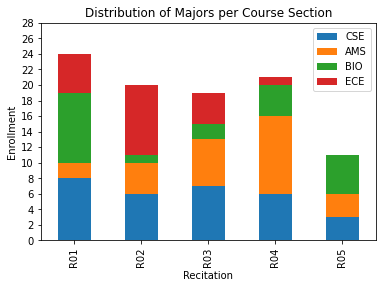

In [ ]:
ax = df.plot(kind='bar', stacked=True)
plt.title('Distribution of Majors per Course Section')
plt.xticks(np.arange(len(cse)), rec)
plt.yticks(np.arange(0, 30, 2))
plt.xlabel('Recitation')
plt.ylabel('Enrollment')
plt.show()

Suppose we wanted to "flip" the data-set, turning rows into columns and columns into rows. We can *transpose* the dataset. We use the `set_index` function to eliminate the row ID numbers (0, 1, 2, 3, 4), which would interfere with column selection after transposing the data.

In [ ]:
df2 = df.copy()
df2.set_index('Rec', inplace=True)
df2 = df2.transpose()
df2

Rec,R01,R02,R03,R04,R05
CSE,8,6,7,6,3
AMS,2,4,6,10,3
BIO,9,1,2,4,5
ECE,5,9,4,1,0


Now we can get a different perspective of the data by visualizing it by major, rather than section number. `bbox_to_anchor` lets you reposition the legend.

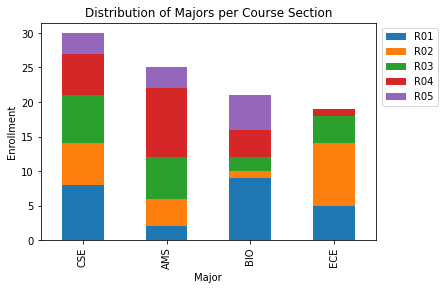

In [ ]:
ax = df2.plot(kind='bar', stacked=True)
ax.legend(bbox_to_anchor=(1.2, 1))
ax.set_title('Distribution of Majors per Course Section')
plt.xlabel('Major')
plt.ylabel('Enrollment')
plt.show()

### Example: Time Series Data

A **time series plot** shows the change in a variable over time. We can construct one using a line plot. We will look at the share price of Apple Computer, Inc. (ticker symbol: AAPL) over a 90-day period as given in [`AAPL.csv`](https://drive.google.com/file/d/1JGJ3LNvr6V384tz8AGayOMFL5_SoAiMO/view?usp=sharing). This dataset is from [Yahoo](https://finance.yahoo.com/)'s finance website.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-24,277.200012,283.010010,277.000000,282.970001,282.206085,31627200
1,2020-04-27,281.799988,284.540009,279.950012,283.170013,282.405548,29271900
2,2020-04-28,285.079987,285.829987,278.200012,278.579987,277.827911,28001200
3,2020-04-29,284.730011,289.670013,283.890015,287.730011,286.953247,34320200
4,2020-04-30,289.959991,294.529999,288.350006,293.799988,293.006836,45457600


Let's look at the data type of each column by looking at the `dtypes` attribute of the data frame.

In [ ]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

The `'Date'` column really doesn't store a date, but rather a string. We can replace the column with a column of `datetime` objects. `datetime` is the native Python data type for representing dates and times.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].head()

0   2020-04-24
1   2020-04-27
2   2020-04-28
3   2020-04-29
4   2020-04-30
Name: Date, dtype: datetime64[ns]

Let's double-check that the data type conversion worked.

In [ ]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

Now we can plot the time series. We can format a date or time in a desired way by giving formatting codes. See the Python documentation for [`datetime`](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes) objects for the details of how to do this.

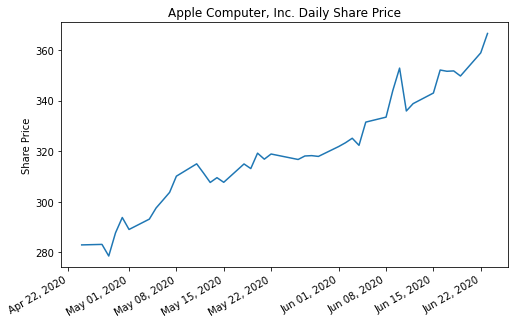

In [ ]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(8, 5))  # change the size of the figure
fig.autofmt_xdate()
ax.set_ylabel('Share Price')
ax.set_title('Apple Computer, Inc. Daily Share Price')
ax.plot(df['Date'], df['Close'])
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d, %Y"))
plt.show()